In [308]:
import statsmodels.api as sm
from pmdarima import auto_arima
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

DATA_PATH_TRAIN = '../bds/treino.csv'


In [309]:
treino = pd.read_csv(DATA_PATH_TRAIN, sep=',')
treino = treino[['Date', 'Close']]
treino['Date'] = pd.to_datetime(treino['Date'])

# Separar features e target
X = treino.drop('Close', axis=1)
y = treino['Close']

In [310]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [311]:
X_train.dtypes

Date    datetime64[ns]
dtype: object

In [312]:
xgb_model1 = XGBRegressor(objective='reg:squarederror',learning_rate=0.028,n_estimators=250,subsample=0.8, colsample_bytree=0.8)
xgb_model1.fit(np.array(X_train.index).reshape(-1,1),y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.028, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=250, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [313]:
predicao = xgb_model1.predict(np.array(X_train.index).reshape(-1,1))

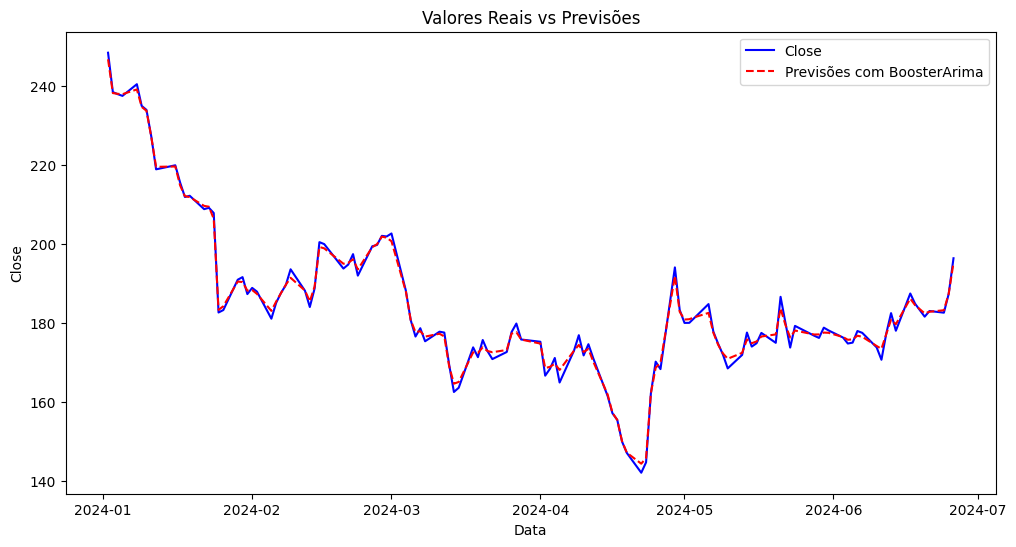

In [314]:
# Plotar os resultados
plt.figure(figsize=(12, 6))
plt.plot(X_train, y_train, label='Close', color='blue')
plt.plot(X_train, predicao, label='Previsões com BoosterArima', color='red', linestyle='--')
plt.xlabel('Data')
plt.ylabel('Close')
plt.title('Valores Reais vs Previsões')
plt.legend()
plt.show()

In [315]:
y_erro1 = y_train - predicao

In [316]:
from scipy.stats import shapiro
def test_normality(residuals):
    """
    Testa a normalidade dos resíduos usando o teste de Shapiro-Wilk.
    :param residuals: array-like, resíduos a serem testados
    :return: tuple com o valor-p e a decisão sobre a normalidade
    """
    # Realiza o teste de Shapiro-Wilk
    stat, p_value = shapiro(residuals)
    
    # Decisão sobre a normalidade
    alpha = 0.05  # Nível de significância
    if p_value > alpha:
        normality = 'Os resíduos parecem seguir uma distribuição normal (não rejeitamos H0).'
    else:
        normality = 'Os resíduos não seguem uma distribuição normal (rejeitamos H0).'
    
    return p_value, normality

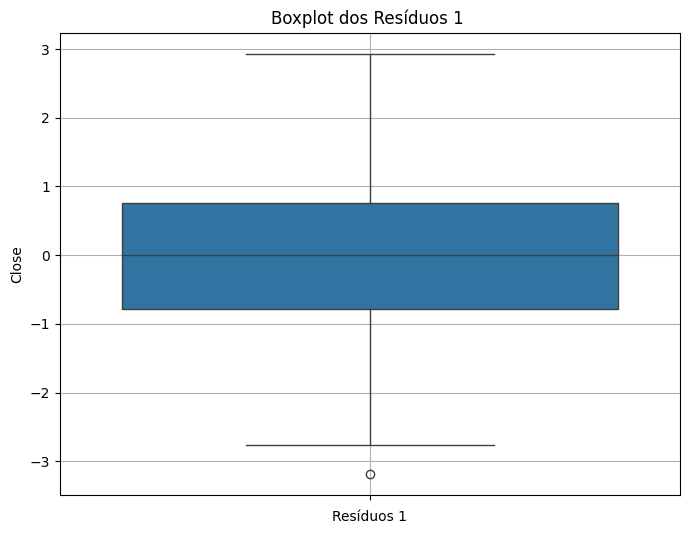

In [317]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=y_erro1)
plt.title('Boxplot dos Resíduos 1 ')
plt.xlabel('Resíduos 1')
plt.grid(True)
plt.show()

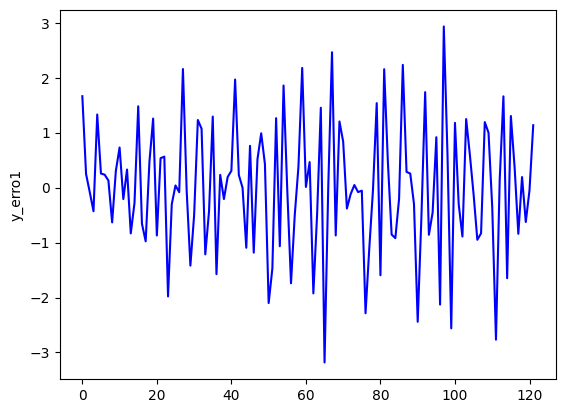

In [318]:
y_erro1.plot(color='b', ylabel='y_erro1');

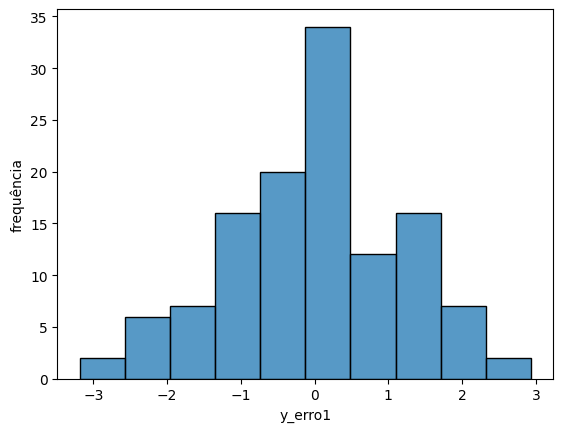

In [319]:
hist1 = sns.histplot(y_erro1)
hist1.set_xlabel('y_erro1');
hist1.set_ylabel('frequência');

In [320]:
test_normality(y_erro1)

(0.7517722280846303,
 'Os resíduos parecem seguir uma distribuição normal (não rejeitamos H0).')

In [321]:
xgb_model2 = XGBRegressor(objective='reg:squarederror',learning_rate=0.028,n_estimators=250,subsample=0.8, colsample_bytree=0.8)
xgb_model2.fit(np.array(X_train.index).reshape(-1,1),y_erro1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.028, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=250, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [322]:
previsao2 = xgb_model2.predict(np.array(X_train.index).reshape(-1,1))
y_erro2 = y_erro1 - previsao2

In [323]:
test_normality(y_erro2)

(0.06375542726207487,
 'Os resíduos parecem seguir uma distribuição normal (não rejeitamos H0).')

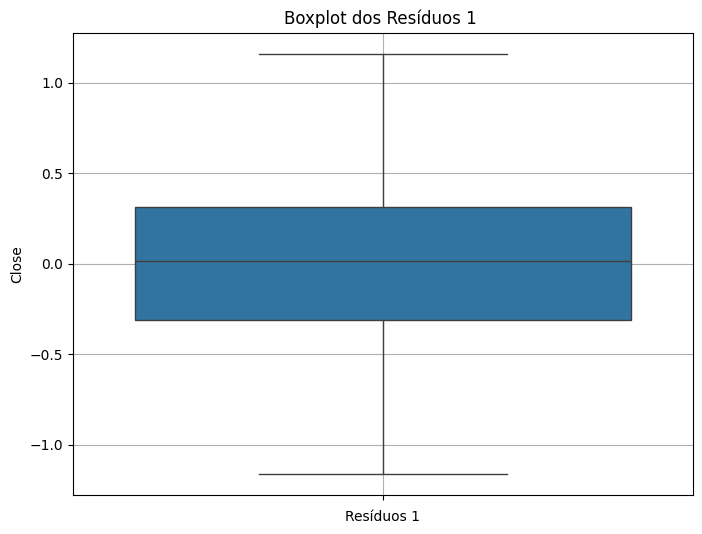

In [324]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=y_erro2)
plt.title('Boxplot dos Resíduos 1 ')
plt.xlabel('Resíduos 1')
plt.grid(True)
plt.show()

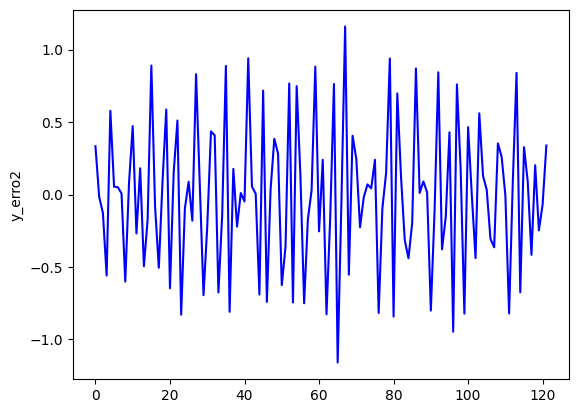

In [325]:
y_erro2.plot(color='b', ylabel='y_erro2');

In [338]:
previsao_total = xgb_model1.predict(np.array(X_train.index).reshape(-1,1)) + xgb_model2.predict(np.array(X_train.index).reshape(-1,1))

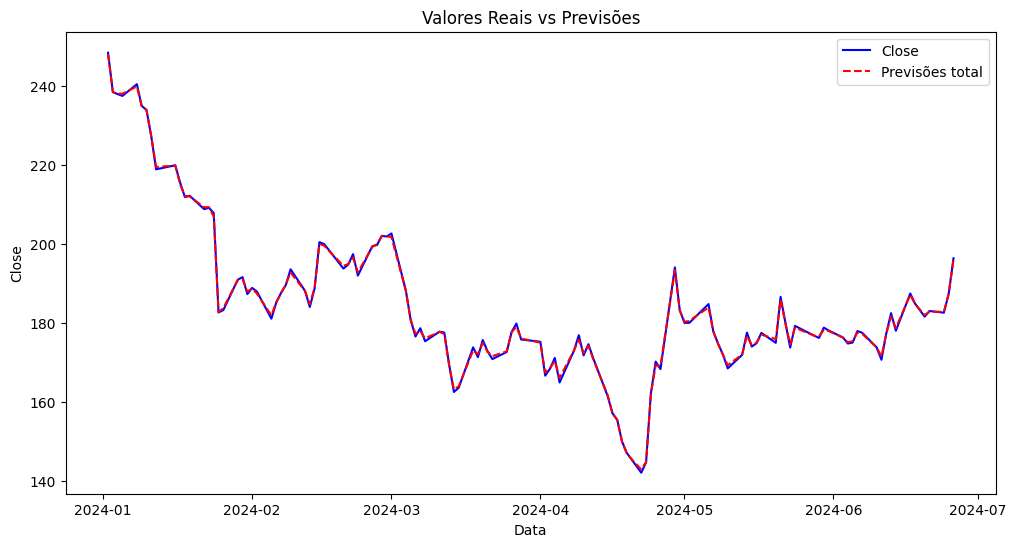

In [339]:
# Plotar os resultados
plt.figure(figsize=(12, 6))
plt.plot(X_train, y_train, label='Close', color='blue')
plt.plot(X_train, previsao_total, label='Previsões total', color='red', linestyle='--')
plt.xlabel('Data')
plt.ylabel('Close')
plt.title('Valores Reais vs Previsões')
plt.legend()
plt.show()